In [ ]:
'''
開始前，必須先去下載 GCP 為我們搜集的Log
並把名字改為 downloaded-logs.csv
上傳到colab

'''

In [2]:
'''
讀取csv

python read csv
https://www.shanelynn.ie/python-pandas-read-csv-load-data-from-csv-files/
'''
import pandas as pd 
data = pd.read_csv("downloaded-logs.csv") 
data

,httpRequest.protocol,httpRequest.requestMethod,httpRequest.requestUrl,httpRequest.userAgent,insertId,jsonPayload.message,jsonPayload.python_logger,logName,receiveTimestamp,resource.labels.project_id,resource.type,severity,sourceLocation.file,sourceLocation.function,sourceLocation.line,spanId,timestamp,trace
0,HTTP/1.1,POST,http://cxcxcc-gcp-ai-bot-test-efvqbybd6q-df.a....,LineBotWebhook/2.0,hrj1fgfuxwfr8,"{""destination"":""U29ac804e9f54eb068260ad5e8e6ad...",ncu_bot_event,projects/cxcxc-gcp-aitutorial511/logs/ncu_bot_...,2021-05-25T14:52:01.528544778Z,cxcxc-gcp-aitutorial511,global,INFO,/app/app.py,callback,69,18256614316369956633,2021-05-25T14:52:01.373652Z,projects/cxcxc-gcp-aitutorial511/traces/d8f6ee...
1,HTTP/1.1,POST,http://cxcxcc-gcp-ai-bot-test-efvqbybd6q-df.a....,LineBotWebhook/2.0,gngiiyfsnbbkl,"{""destination"":""U29ac804e9f54eb068260ad5e8e6ad...",ncu_bot_event,projects/cxcxc-gcp-aitutorial511/logs/ncu_bot_...,2021-05-25T14:51:50.930178412Z,cxcxc-gcp-aitutorial511,global,INFO,/app/app.py,callback,69,13708232452372299362,2021-05-25T14:51:50.626148Z,projects/cxcxc-gcp-aitutorial511/traces/d58251...
2,HTTP/1.1,POST,http://cxcxcc-gcp-ai-bot-test-efvqbybd6q-df.a....,LineBotWebhook/2.0,1kbqgf3f2koxvt,"{""destination"":""U29ac804e9f54eb068260ad5e8e6ad...",ncu_bot_event,projects/cxcxc-gcp-aitutorial511/logs/ncu_bot_...,2021-05-25T14:51:43.642215777Z,cxcxc-gcp-aitutorial511,global,INFO,/app/app.py,callback,69,8209959960012449837,2021-05-25T14:51:43.367220Z,projects/cxcxc-gcp-aitutorial511/traces/0bd7e0...
3,HTTP/1.1,POST,http://cxcxcc-gcp-ai-bot-test-efvqbybd6q-df.a....,LineBotWebhook/2.0,81q6hag15z2wvm,"{""destination"":""U29ac804e9f54eb068260ad5e8e6ad...",ncu_bot_event,projects/cxcxc-gcp-aitutorial511/logs/ncu_bot_...,2021-05-25T14:51:43.023698208Z,cxcxc-gcp-aitutorial511,global,INFO,/app/app.py,callback,69,15560880655831835055,2021-05-25T14:51:42.881597Z,projects/cxcxc-gcp-aitutorial511/traces/4ef26e...
4,HTTP/1.1,POST,http://cxcxcc-gcp-ai-bot-test-efvqbybd6q-df.a....,LineBotWebhook/2.0,qczlu4g1a592lv,"{""destination"":""U29ac804e9f54eb068260ad5e8e6ad...",ncu_bot_event,projects/cxcxc-gcp-aitutorial511/logs/ncu_bot_...,2021-05-25T04:50:00.395567767Z,cxcxc-gcp-aitutorial511,global,INFO,/app/app.py,callback,69,1566630331417200375,2021-05-25T04:50:00.250961Z,projects/cxcxc-gcp-aitutorial511/traces/e6307f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,HTTP/1.1,POST,http://cxcxcc-gcp-ai-bot-test-efvqbybd6q-df.a....,LineBotWebhook/2.0,10wmbshg1ffskw0,"{""destination"":""U29ac804e9f54eb068260ad5e8e6ad...",ncu_bot_event,projects/cxcxc-gcp-aitutorial511/logs/ncu_bot_...,2021-05-19T05:49:27.011764140Z,cxcxc-gcp-aitutorial511,global,INFO,/app/app.py,callback,69,633393085958008071,2021-05-19T05:49:26.927786Z,projects/cxcxc-gcp-aitutorial511/traces/37a44a...
156,HTTP/1.1,POST,http://cxcxcc-gcp-ai-bot-test-efvqbybd6q-df.a....,LineBotWebhook/2.0,1qfxs3hg5m2aqiq,"{""destination"":""U29ac804e9f54eb068260ad5e8e6ad...",ncu_bot_event,projects/cxcxc-gcp-aitutorial511/logs/ncu_bot_...,2021-05-19T05:49:04.013326610Z,cxcxc-gcp-aitutorial511,global,INFO,/app/app.py,callback,69,523944980396671886,2021-05-19T05:49:03.992696Z,projects/cxcxc-gcp-aitutorial511/traces/f8c562...
157,HTTP/1.1,POST,http://cxcxcc-gcp-ai-bot-test-efvqbybd6q-df.a....,LineBotWebhook/2.0,dvhawug5ptzpah,"{""destination"":""U29ac804e9f54eb068260ad5e8e6ad...",ncu_bot_event,projects/cxcxc-gcp-aitutorial511/logs/ncu_bot_...,2021-05-19T05:48:56.987081431Z,cxcxc-gcp-aitutorial511,global,INFO,/app/app.py,callback,69,1338988266494206570,2021-05-19T05:48:56.965927Z,projects/cxcxc-gcp-aitutorial511/traces/61d88d...
158,HTTP/1.1,POST,http://cxcxcc-gcp-ai-bot-test-efvqbybd6q-df.a....,LineBotWebhook/2.0,ofj7d0g5nlj0ou,"{""destination"":""U29ac804e9f54eb068260ad5e8e6ad...",ncu_bot_event,projects/cxcxc-gcp-aitutorial511/logs/ncu_bot_...,2021-05-19T05:48:56.495031080Z,cxcxc-gcp-aitutorial511,global,INFO,/app/app.py,callback,69,3685072867035670106,2021-05-19T

In [3]:
'''
抓出指定欄位 - jsonPayload.message

'''
data['jsonPayload.message']

0      {"destination":"U29ac804e9f54eb068260ad5e8e6ad...
1      {"destination":"U29ac804e9f54eb068260ad5e8e6ad...
2      {"destination":"U29ac804e9f54eb068260ad5e8e6ad...
3      {"destination":"U29ac804e9f54eb068260ad5e8e6ad...
4      {"destination":"U29ac804e9f54eb068260ad5e8e6ad...
                             ...                        
155    {"destination":"U29ac804e9f54eb068260ad5e8e6ad...
156    {"destination":"U29ac804e9f54eb068260ad5e8e6ad...
157    {"destination":"U29ac804e9f54eb068260ad5e8e6ad...
158    {"destination":"U29ac804e9f54eb068260ad5e8e6ad...
159    {"destination":"U29ac804e9f54eb068260ad5e8e6ad...
Name: jsonPayload.message, Length: 160, dtype: object

In [4]:
'''
將jsonPayload.message 的欄位內容 轉成csv

欄位若無值，則不填

'''
import json
json_data_list = []

#設定dataframe的欄位
df_message = pd.DataFrame(columns=['userId', 'timestamp', 'event_type','message_type','message_id', 'message_text'])
#讀取jsonPayload ,message每一筆都拿來跑回圈
for row in  data['jsonPayload.message']:
  
  events = json.loads(row).get('events')[0]
  print(json.loads(row).get('events')[0])
  # json_data_list.append()
  # print(line_event.get('type'))
  # print(line_event.get('message'))
  # print(line_event.get('message').get('id'))
  # print(line_event.get('timestamp'))
  # print(line_event.get('source').get('userId'))

  #若事件簿為關注、封鎖、回傳動作事件
  if events.get('type') not in ['follow','unfollow','postback']:
    df_message = df_message.append(
        {
          'userId': events.get('source').get('userId'), 
          'timestamp': events.get('timestamp'), 
          'event_type': events.get('type'),
          'message_type': events.get('message').get('type'),
          'message_id': events.get('message').get('id'),
          'message_text': events.get('message').get('text')
        },
        ignore_index=True)
  #如果是回傳動作
  elif events.get('type')  in ['postback']:
    df_message =df_message.append(
        {
          'userId': events.get('source').get('userId'), 
          'timestamp': events.get('timestamp'), 
          'event_type': events.get('type'),
          'message_text': events.get('postback').get('data')
        },
        ignore_index=True
    )
  #若是關注與封鎖事件
  else:
    df_message = df_message.append(
        {
          'userId': events.get('source').get('userId'), 
          'timestamp': events.get('timestamp'), 
          'event_type': events.get('type')
        },
        ignore_index=True)

df_message

{'type': 'message', 'message': {'type': 'image', 'id': '14113222691529', 'contentProvider': {'type': 'line'}}, 'timestamp': 1621954321166, 'source': {'type': 'user', 'userId': 'U9e1856f1111de9cfdada96ed369e0921'}, 'replyToken': '903e592eb3e6478991212176df1c2db5', 'mode': 'active'}
{'type': 'message', 'message': {'type': 'text', 'id': '14113220884034', 'text': '其實也沒什麼內容，我只是想說，我是劉孔'}, 'timestamp': 1621954294441, 'source': {'type': 'user', 'userId': 'U9e1856f1111de9cfdada96ed369e0921'}, 'replyToken': '7545b3af10d84ce59174a18aa758405f', 'mode': 'active'}
{'type': 'follow', 'timestamp': 1621954286934, 'source': {'type': 'user', 'userId': 'U9e1856f1111de9cfdada96ed369e0921'}, 'replyToken': 'ee527cafc6964fee8297010aca0eb581', 'mode': 'active'}
{'type': 'unfollow', 'timestamp': 1621954285998, 'source': {'type': 'user', 'userId': 'U9e1856f1111de9cfdada96ed369e0921'}, 'mode': 'active'}
{'type': 'follow', 'timestamp': 1621918182869, 'source': {'type': 'user', 'userId': 'U2edaff8178bb0004b976519cd

,userId,timestamp,event_type,message_type,message_id,message_text
0,U9e1856f1111de9cfdada96ed369e0921,1621954321166,message,image,14113222691529,None
1,U9e1856f1111de9cfdada96ed369e0921,1621954294441,message,text,14113220884034,其實也沒什麼內容，我只是想說，我是劉孔
2,U9e1856f1111de9cfdada96ed369e0921,1621954286934,follow,NaN,NaN,NaN
3,U9e1856f1111de9cfdada96ed369e0921,1621954285998,unfollow,NaN,NaN,NaN
4,U2edaff8178bb0004b976519cd23c0941,1621918182869,follow,NaN,NaN,NaN
...,...,...,...,...,...,...
155,Ueda3946aa91ed8359636aa41503370c9,1621403366738,unfollow,NaN,NaN,NaN
156,Ueda3946aa91ed8359636aa41503370c9,1621403343398,message,text,14076510653356,秉鴻
157,Ueda3946aa91ed8359636aa41503370c9,1621403336746,follow,NaN,NaN,NaN
158,Ueda3946aa91ed8359636aa41503370c9,1621403336088,unfollow,NaN,NaN,NaN


In [5]:
# 安裝line 套件
!pip install line-bot-sdk

     |████████████████████████████████| 71kB 4.4MB/s 


In [6]:
'''

設置Line Bot Api 的 Channel access token

'''

from linebot import (
    LineBotApi, WebhookHandler
)

line_bot_api = LineBotApi('aaGicMpJZoGYeb0JUvhbWE5pfCEWg0zZqLiVR/01CMNyK5ZwMLERqenQsxw61WC7WfVW2gTzn1T71TNawzldEl6zNnMv6qM7+75XjNErh3oXh9gSGF2+Gh/QIaMJx3N3B0AkHsSbfRJOSqO5dPZ5MgdB04t89/1O/w1cDnyilFU=')

In [11]:
'''
取出用戶id，向Line要個資
整理成一份用戶個資名單
'''

#  依據先前的csv他裡面的用戶id設計了四個用戶id、暱稱、照片、狀態
user_info_df= pd.DataFrame(columns=['userId', 'display_name', 'picture_url','status_message'])

#把所有用戶的id都拿來跑回圈
for user_id in df_message['userId'].unique():
  #讀取個資
  try:
    line_user_profile = line_bot_api.get_profile(user_id) #內容填入心得data frame
    user_info_df = user_info_df.append(
        {
          'display_name': line_user_profile.display_name, 
          'userId': line_user_profile.user_id, 
          'picture_url': line_user_profile.picture_url,
          'status_message': line_user_profile.status_message
        },
        ignore_index=True)
  except:
    pass

user_info_df

,userId,display_name,picture_url,status_message
0,U9e1856f1111de9cfdada96ed369e0921,Victor,https://sprofile.line-scdn.net/0hILLUJGHRFmNhL...,None
1,U2edaff8178bb0004b976519cd23c0941,JamesWu,https://sprofile.line-scdn.net/0hxC4tYeYeJ2wZD...,None
2,Ueda3946aa91ed8359636aa41503370c9,Ruby,https://sprofile.line-scdn.net/0hz6xlt80KJRlVF...,(zoning out)
3,U8cc4c4ad800344ccbaec0593c2e11c55,融仔,https://sprofile.line-scdn.net/0hYUTJ5gPTBnp5M...,None
4,U7f96387a20eb114fd2d98db750b80dbd,Jay亻桀,https://sprofile.line-scdn.net/0hAWWE3D2fHnh6P...,There is always something authentic concealed ...
5,U11ece86626047d34e7cbd680c54d13ec,Wen-Hsuan,https://sprofile.line-scdn.net/0h59tto4qyahZZD...,None
6,U4f0d652a37485fe425ba9907594099b3,🌸 Dora 🌼,https://sprofile.line-scdn.net/0h1MW46Zk7bmJ6T...,None
7,U8ead87ac9810d70db31051d32cb41958,吳礎安,https://sprofile.line-scdn.net/0hWPVTsdwtCH97L...,None
8,U9b74edc320821da3c1c63ade0cfd74fc,Lisa,https://sprofile.line-scdn.net/0hPTiOQnhID3tEN...,None
9,U467eb0fa83e2f09e2edfb7534ba9581c,林庠達,https://sprofile.line-scdn.net/0h5MQfAHbfamJ8H...,None


In [12]:
'''

將用戶個資名單跟 jsonPayload的欄位內容 整理在一份csv

'''
#把兩張表合併
merge_data = pd.merge(df_message, user_info_df)
merge_data

,userId,timestamp,event_type,message_type,message_id,message_text,display_name,picture_url,status_message
0,U9e1856f1111de9cfdada96ed369e0921,1621954321166,message,image,14113222691529,None,Victor,https://sprofile.line-scdn.net/0hILLUJGHRFmNhL...,None
1,U9e1856f1111de9cfdada96ed369e0921,1621954294441,message,text,14113220884034,其實也沒什麼內容，我只是想說，我是劉孔,Victor,https://sprofile.line-scdn.net/0hILLUJGHRFmNhL...,None
2,U9e1856f1111de9cfdada96ed369e0921,1621954286934,follow,NaN,NaN,NaN,Victor,https://sprofile.line-scdn.net/0hILLUJGHRFmNhL...,None
3,U9e1856f1111de9cfdada96ed369e0921,1621954285998,unfollow,NaN,NaN,NaN,Victor,https://sprofile.line-scdn.net/0hILLUJGHRFmNhL...,None
4,U9e1856f1111de9cfdada96ed369e0921,1621645790222,message,image,14092869825131,None,Victor,https://sprofile.line-scdn.net/0hILLUJGHRFmNhL...,None
...,...,...,...,...,...,...,...,...,...
155,U84e79d0f6afa92abee74c6ddf2619787,1621403772997,follow,NaN,NaN,NaN,邦,https://profile.line-scdn.net/0m078807bc72519e...,None
156,Ua754d1fea1aa32eb6b30b30eeda4c21f,1621403749025,message,image,14076540890652,None,Kurt Lee,https://sprofile.line-scdn.net/0hFhLOdTXAGUdhN...,time up.
157,Ua754d1fea1aa32eb6b30b30eeda4c21f,1621403740805,follow,NaN,NaN,NaN,Kurt Lee,https://sprofile.line-scdn.net/0hFhLOdTXAGUdhN...,time up.
158,Ud9aa618f8aae6de924715ab6945b6693,1621403659721,follow,NaN,NaN,NaN,巫旻龍,https://sprofile.line-scdn.net/0hNIKCBEEWEWZmO...,5


In [13]:
'''
timestamp 轉換成人類可懂的時間
'''

import datetime
human_use_date=[]
#提取機器時間欄位
for stamp in merge_data['timestamp']:
  #依序整理人類可懂的時間欄位
  timestamp = datetime.datetime.fromtimestamp(
      stamp/1000+8*3600
      )
  human_use_date.append(timestamp.strftime('%Y-%m-%d %H:%M:%S'))
  
#把新欄位加入到原本的資料內
merge_data['human_date']=human_use_date
merge_data

,userId,timestamp,event_type,message_type,message_id,message_text,display_name,picture_url,status_message,human_date
0,U9e1856f1111de9cfdada96ed369e0921,1621954321166,message,image,14113222691529,None,Victor,https://sprofile.line-scdn.net/0hILLUJGHRFmNhL...,None,2021-05-25 22:52:01
1,U9e1856f1111de9cfdada96ed369e0921,1621954294441,message,text,14113220884034,其實也沒什麼內容，我只是想說，我是劉孔,Victor,https://sprofile.line-scdn.net/0hILLUJGHRFmNhL...,None,2021-05-25 22:51:34
2,U9e1856f1111de9cfdada96ed369e0921,1621954286934,follow,NaN,NaN,NaN,Victor,https://sprofile.line-scdn.net/0hILLUJGHRFmNhL...,None,2021-05-25 22:51:26
3,U9e1856f1111de9cfdada96ed369e0921,1621954285998,unfollow,NaN,NaN,NaN,Victor,https://sprofile.line-scdn.net/0hILLUJGHRFmNhL...,None,2021-05-25 22:51:25
4,U9e1856f1111de9cfdada96ed369e0921,1621645790222,message,image,14092869825131,None,Victor,https://sprofile.line-scdn.net/0hILLUJGHRFmNhL...,None,2021-05-22 09:09:50
...,...,...,...,...,...,...,...,...,...,...
155,U84e79d0f6afa92abee74c6ddf2619787,1621403772997,follow,NaN,NaN,NaN,邦,https://profile.line-scdn.net/0m078807bc72519e...,None,2021-05-19 13:56:12
156,Ua754d1fea1aa32eb6b30b30eeda4c21f,1621403749025,message,image,14076540890652,None,Kurt Lee,https://sprofile.line-scdn.net/0hFhLOdTXAGUdhN...,time up.,2021-05-19 13:55:49
157,Ua754d1fea1aa32eb6b30b30eeda4c21f,1621403740805,follow,NaN,NaN,NaN,Kurt Lee,https://sprofile.line-scdn.net/0hFhLOdTXAGUdhN...,time up.,2021-05-19 13:55:40
158,Ud9aa618f8aae6de924715ab6945b6693,1621403659721,follow,NaN,NaN,NaN,巫旻龍,https://sprofile.line-scdn.net/0hNIKCBEEWEWZmO...,5,2021-05-19 13:54:19


In [16]:
'''
將資料存成csv
'''
merge_data.to_csv("final_data.csv")

In [ ]:
'''

進行可視化

外國人不考慮中文，中文會是亂碼

'''



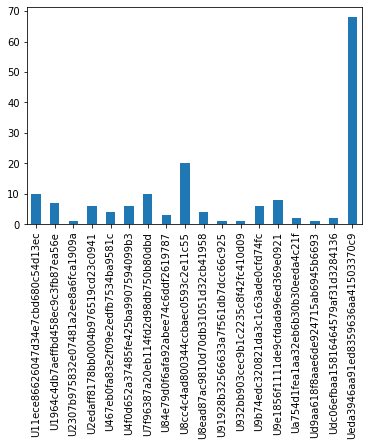

In [17]:
'''
看看誰發的話多
'''

merge_data['userId'].value_counts().sort_index().plot.bar()
# merge_data['timestamp'].plot.hist()

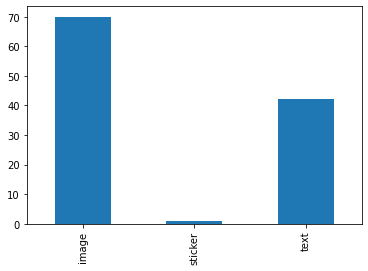

In [18]:
'''
看看都發哪一類型的消息
'''
merge_data['message_type'].value_counts().sort_index().plot.bar()